<a href="https://colab.research.google.com/github/budsayamasNithi/AI/blob/main/iris6406021620149.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise**
ให้ทดลองจำแนกข้อมูลด้วย Neural network กับชุดข้อมูล iris โดยแบ่ง ชุดข้อมูลฝึกและทดสอบเป็น 80:20 และ batch size = 50 epoch = 3

แสดงค่า accuracy ของโมเดลที่ได้

จงวาด confusion matrix ของการจำแนก และ plot graph แสดงการเปรียบเทียบระหว่างการเรียนรู้กับการทดสอบ

จงแสดงแผนภาพ neural network ของโมเดลที่ได้

ทดสอบ Model ที่ได้กับชุดข้อมูลที่ไม่เคยพบมาก่อน (unseen data) จำนวน 5 ตัวอย่าง



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import io
from google.colab import files
uploaded = files.upload()
iris= pd.read_csv(io.BytesIO(uploaded['iris.csv'])) #ชื่อไฟล์ที่อยู่ในวงเล็กต้องตรงกับชื่อไฟล์จริงๆ ที่เรา upload ขึ้น
print(iris)

Saving iris.csv to iris.csv
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [3]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
iris.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
iris.shape

(150, 5)

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]

In [9]:
X.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head(10)

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
6    setosa
7    setosa
8    setosa
9    setosa
Name: species, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
print(X_train)

     sepal_length  sepal_width  petal_length  petal_width
137           6.4          3.1           5.5          1.8
84            5.4          3.0           4.5          1.5
27            5.2          3.5           1.5          0.2
127           6.1          3.0           4.9          1.8
132           6.4          2.8           5.6          2.2
..            ...          ...           ...          ...
9             4.9          3.1           1.5          0.1
103           6.3          2.9           5.6          1.8
67            5.8          2.7           4.1          1.0
117           7.7          3.8           6.7          2.2
47            4.6          3.2           1.4          0.2

[120 rows x 4 columns]


In [17]:
print(Y_train)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 

In [18]:
print(Y_test)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]]


In [19]:
pip install keras

In [20]:
pip install tensorflow

In [21]:
from keras import Sequential
from keras.layers import Dense

In [22]:
from tensorflow.keras.optimizers import SGD

In [23]:
classifier = Sequential() # create name

#First Hidden Layer
classifier.add(Dense(10,input_shape=(4,), activation='tanh', )) # first layer 8 nod use relu activatio input_dim must match which input

#Second Hidden Layer
classifier.add(Dense(4, activation='tanh'))
classifier.add(Dense(4, activation='tanh'))


#Output Layer
classifier.add(Dense(3, activation='softmax'))
#output = activation(dot(input, kernel) + bias)

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [25]:
opt = SGD(lr=0.01)
classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
#Fitting the data to training dataset
#classifier.fit(X_train, Y_train, batch_size=10, epochs=100)
history = classifier.fit(X_train, Y_train, batch_size=50, epochs=3, validation_data=(X_test, Y_test))

Epoch 1/3
3/3 [==============================] - 0s 66ms/step - loss: 1.1561 - accuracy: 0.3250 - val_loss: 1.1825 - val_accuracy: 0.3667
Epoch 2/3
3/3 [==============================] - 0s 38ms/step - loss: 1.1480 - accuracy: 0.3250 - val_loss: 1.1740 - val_accuracy: 0.3667
Epoch 3/3
3/3 [==============================] - 0s 24ms/step - loss: 1.1399 - accuracy: 0.3250 - val_loss: 1.1656 - val_accuracy: 0.3667


In [27]:
#eval_model = classifier.evaluate(X_train, Y_train)
#print(eval_model)
score = classifier.evaluate(X_train, Y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  1.1826741695404053
Train accuracy :  0.32499998807907104


In [28]:
score1 = classifier.evaluate(X_test, Y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  1.2022665739059448
Test accuracy :  0.36666667461395264


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


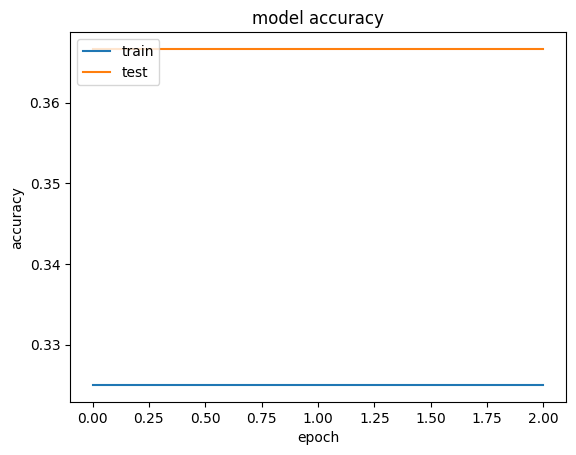

In [29]:
import matplotlib.pyplot as plt # For graphical representation
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [32]:
print(X_test)

     sepal_length  sepal_width  petal_length  petal_width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3          2.9           6.3          1.8
7             5.0          3.4           1.5          0.2
100           6.3          3.3           6.0          2.5
40            5.0          3.5           1.3          0.3
86            6.7          3.1           4.7          1.5
76            6.8          2.8           4.8          1.4
71            6.1          2.8           4.0          1.3
134           6.1          2.6           5.6          1.4
51            6.4          3.2           4.5          1.5
73            6.1          2.8           4.7          1.2
54            6.5          2.8           4.6          1.5
63            6.1          2.9           4.7          1.4
37            4.9          3.1           1.5          0.1
78            

In [33]:
Y_pred = classifier.predict(X_test)

Y_pred = (Y_pred > 0.5).astype("int32")

1/1 [==============================] - 0s 151ms/step


In [34]:
print(Y_pred)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [35]:
print(Y_test)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]]


In [36]:
classifier.save("pima_model.h5")
print("Saved model.")

Saved model.


In [38]:
from numpy import loadtxt
from keras.models import load_model

#load model
model = load_model('pima_model.h5')

#summarize model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [39]:
pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=6d48c0c9c031aabf405b53771a148fde37f1b2f0ff039c1cdeff34d44935346d
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [40]:
pip install graphviz

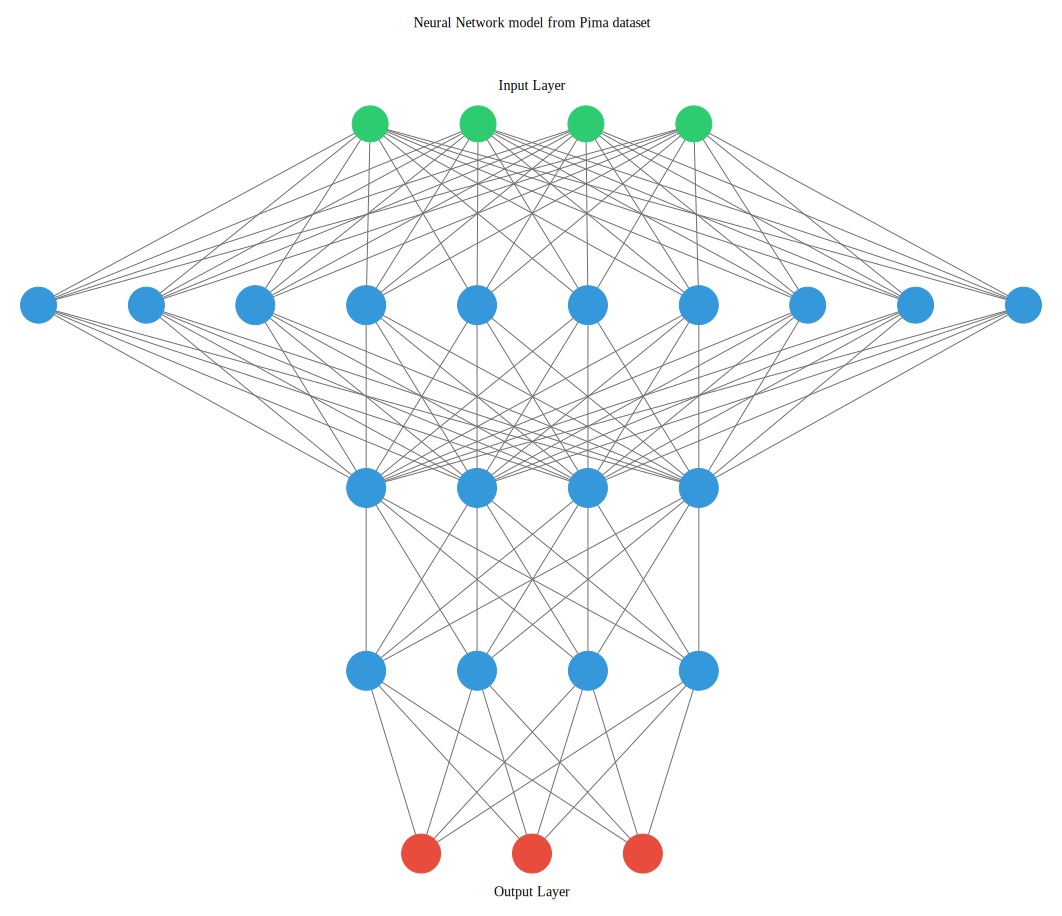

In [41]:
from ann_visualizer.visualize import ann_viz;
import graphviz
ann_viz(classifier,  filename='newmodel.gv',title=" Neural Network model from Pima dataset")
graph_file = graphviz.Source.from_file('newmodel.gv')
graph_file

In [42]:
uploaded = files.upload()
udata = pd.read_csv(io.BytesIO(uploaded['verginanew.csv']))
print(udata)
X_new = udata.iloc[:, 0:4]

Saving verginanew.csv to verginanew.csv
   sepal_length  sepal_width  petal_length  petal_width  species
0           6.9          3.5           1.4          0.2      NaN
1           4.9          4.5           1.4          0.2      NaN
2           4.7          3.2           1.3          0.2      NaN
3           4.6          3.1           1.5          0.2      NaN
4           5.0          2.1           2.1          0.2      NaN


In [43]:
sc = StandardScaler()
X_new = sc.fit_transform(X_new)

NameError: ignored

In [44]:
predict_x=model.predict(X_new)
print(predict_x)
classes_x=np.argmax(predict_x,axis=-1)
# classes_x = (predict_x > 0.5).astype("int32")

for i in range(len(classes_x)):
  if(classes_x[i] == 0):
    name = 'setosa'
  elif (classes_x[i] == 1):
    name = 'versicolor'
  elif (classes_x[i] == 2):
    name = 'virginica'


  print("The label of unsenn data is ", predict_x[i], '\t', name)

1/1 [==============================] - 0s 71ms/step
[[0.4657834  0.16940603 0.3648105 ]
 [0.42078912 0.17025231 0.40895855]
 [0.44977134 0.17406891 0.37615982]
 [0.4474215  0.17871892 0.3738596 ]
 [0.45345807 0.1878591  0.35868284]]
The label of unsenn data is  [0.4657834  0.16940603 0.3648105 ] 	 setosa
The label of unsenn data is  [0.42078912 0.17025231 0.40895855] 	 setosa
The label of unsenn data is  [0.44977134 0.17406891 0.37615982] 	 setosa
The label of unsenn data is  [0.4474215  0.17871892 0.3738596 ] 	 setosa
The label of unsenn data is  [0.45345807 0.1878591  0.35868284] 	 setosa
